In [1]:
import librosa
audio_path = "audio/afrikaans1.mp3"
audio_path2 = "audio/hindi1.mp3"
audio_path3 = "audio/bengali1.mp3"
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

/Users/parijatparimal/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>


In [2]:
librosa.load(audio_path, sr=None)

/Users/parijatparimal/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(array([ 0.00906372,  0.01101685,  0.00881958, ..., -0.00131226,
        -0.00134277, -0.00091553], dtype=float32),
 44100)

In [3]:
import IPython.display as ipd
ipd.Audio(audio_path)

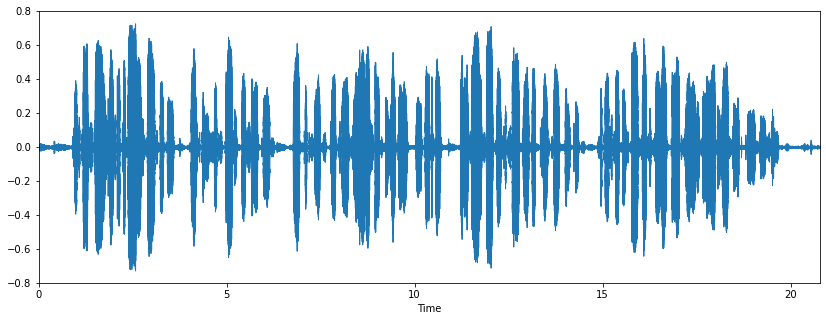

In [4]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

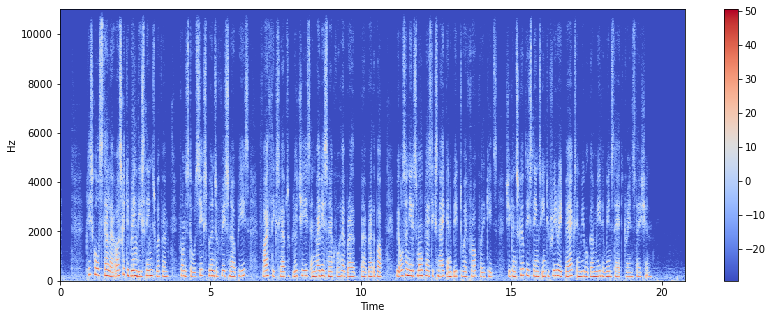

In [5]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

/Users/parijatparimal/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


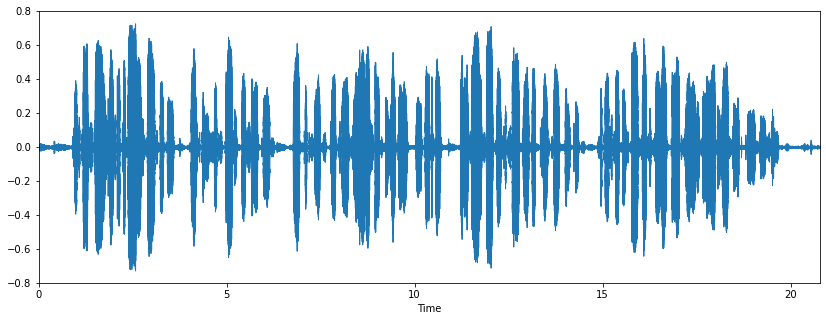

In [6]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

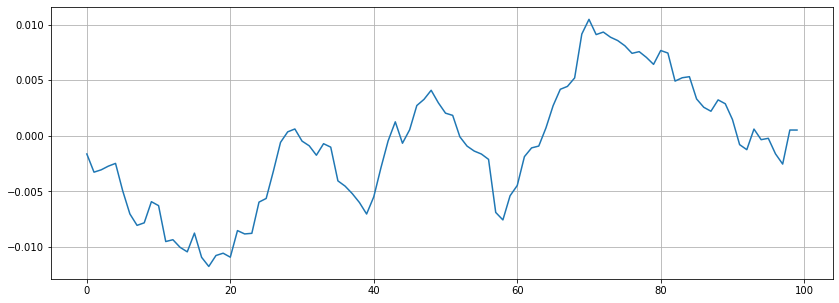

In [7]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [8]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

11


range(0, 895)


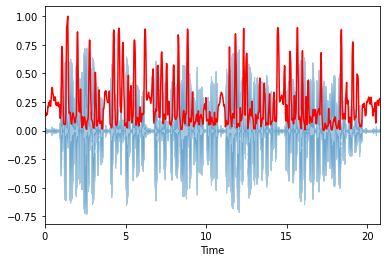

In [9]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
print(frames)
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

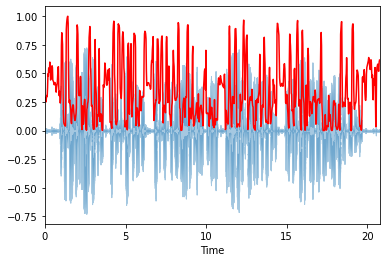

In [10]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(12, 895)


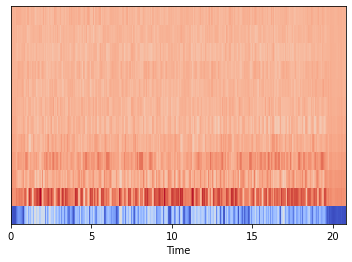

In [11]:
mfccs = librosa.feature.mfcc(x, n_mfcc=12)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

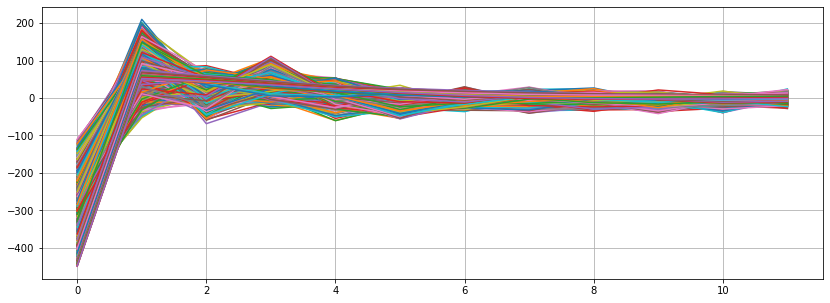

In [12]:
import statistics as stats
plt.figure(figsize=(14, 5))
plt.plot(mfccs)
plt.grid()

[-281.02118, 99.56105, 15.924563, 40.524094, 8.373213, -8.396759, -3.0540822, -3.6354346, -1.3550032, -10.623615, -5.4490833, -2.4324234]


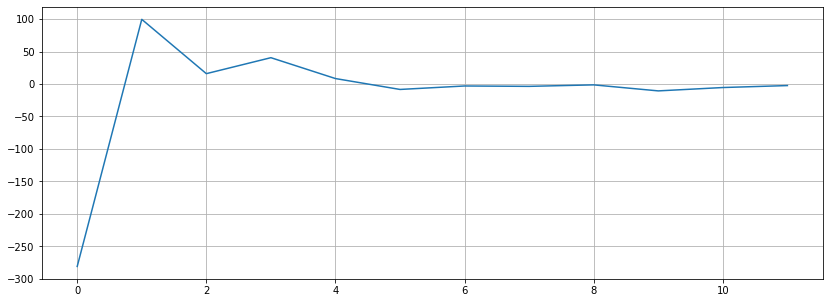

In [13]:
plt.figure(figsize=(14, 5))
mfcc = []
for m in mfccs:
    mfcc.append(stats.mean(m))
plt.plot(mfcc)
plt.grid()
print(mfcc)